In [1]:
import escnn

2023-07-12 13:45:13.916072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 13:45:14.074349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-12 13:45:14.074365: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-12 13:45:14.698144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
from escnn import nn as esnn
from escnn import gspaces, group

# show gspaces

In [3]:
group_c4 = group.cyclic_group(4)

In [4]:
gspace_c4 = gspaces.no_base_space(group_c4)

In [5]:
gspace_c4.regular_repr

C4|[regular]:4

In [6]:
gspace_c4.regular_repr.representation(group_c4.elements[1])

array([[ 5.55111512e-17, -5.55111512e-17, -8.32667268e-17,
         1.00000000e+00],
       [ 1.00000000e+00,  5.55111512e-17, -5.55111512e-17,
        -8.32667268e-17],
       [ 5.55111512e-17,  1.00000000e+00,  5.55111512e-17,
        -5.55111512e-17],
       [-5.55111512e-17,  5.55111512e-17,  1.00000000e+00,
         5.55111512e-17]])

# visualize representation

In [7]:
import matplotlib.pyplot as plt

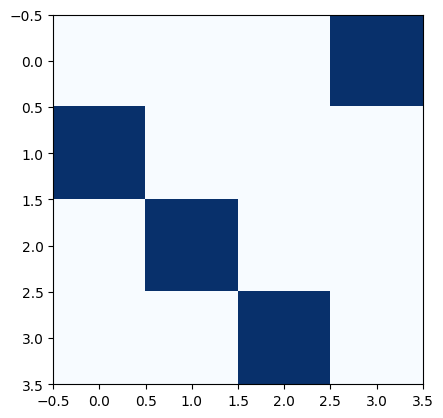

In [8]:
plt.imshow(
    gspace_c4.regular_repr.representation(group_c4.elements[1]),
    cmap='Blues'
)

In [10]:
gspace_c4.irrep(1).representation(group_c4.elements[1])

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

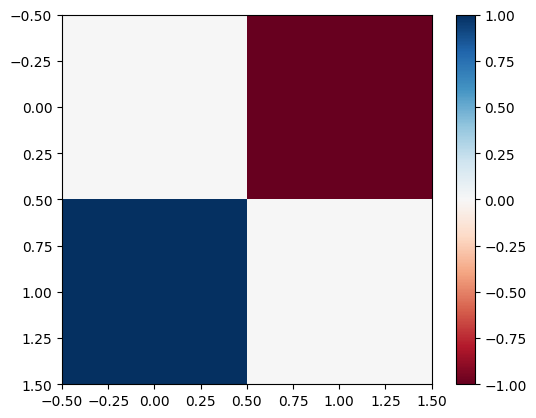

In [12]:
plt.imshow(
    gspace_c4.irrep(1).representation(group_c4.elements[1]),
    cmap='RdBu'
)
plt.colorbar()

# define feature types

In [17]:
type_in = gspace_c4.type(
    *[gspace_c4.regular_repr] * 1 + [gspace_c4.trivial_repr] * 3 + [gspace_c4.irrep(1)] * 2
)

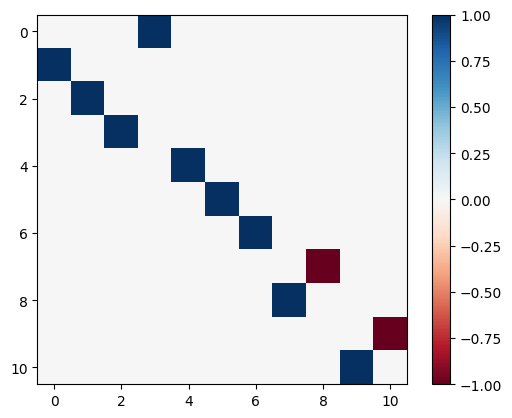

In [15]:
plt.imshow(
    type_in.representation(group_c4.elements[1]),
    cmap='RdBu'
)
plt.colorbar()

In [22]:
type_out = gspace_c4.type(
    *[gspace_c4.trivial_repr] * 2 + [gspace_c4.irrep(1)] * 1
)

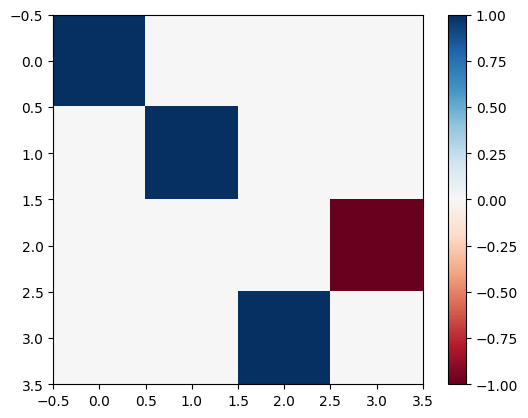

In [23]:
plt.imshow(
    type_out.representation(group_c4.elements[1]),
    cmap='RdBu'
)
plt.colorbar()

# transform input

In [25]:
import torch

In [44]:
tensor_in_test = torch.tensor([1.0, 0, 0, 0, 1, 0, 0, 1, 1, -1, -1], dtype=torch.float).reshape(-1, 1)

In [45]:
tensor_in_test

tensor([[ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 1.],
        [ 0.],
        [ 0.],
        [ 1.],
        [ 1.],
        [-1.],
        [-1.]])

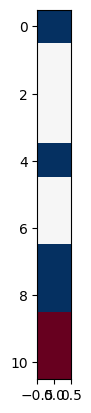

In [48]:
plt.imshow(tensor_in_test, cmap='RdBu')

In [50]:
type_in.transform_fibers(input=tensor_in_test, element=group_c4.elements[1])

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
        [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.],
        [-1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.]])

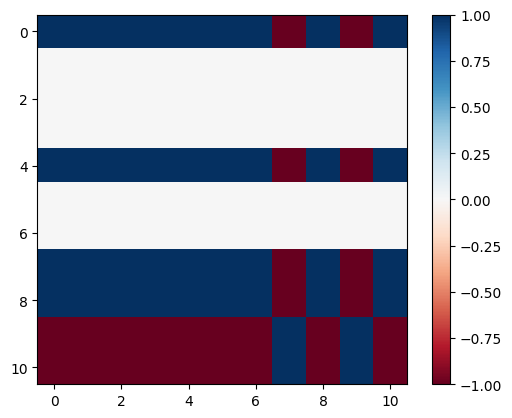

In [56]:
plt.imshow(type_in.transform_fibers(input=tensor_in_test, element=group_c4.elements[1]),
           cmap='RdBu')
plt.colorbar()

# initialize input

In [26]:
batch_size = 7

In [30]:
type_in.size

11

In [32]:
tensor_in = type_in(torch.randn(batch_size, type_in.size))

In [33]:
tensor_in.shape

torch.Size([7, 11])

In [36]:
type_out.size

4

# rotation equivariant network - MLP

In [24]:
esnn.Linear(type_in, type_out)

Linear(
  (_basisexpansion): BlocksBasisExpansion(
    (block_expansion_('irrep_0', 'irrep_0')): SingleBlockBasisExpansion()
    (block_expansion_('irrep_1', 'irrep_1')): SingleBlockBasisExpansion()
    (block_expansion_('regular', 'irrep_0')): SingleBlockBasisExpansion()
    (block_expansion_('regular', 'irrep_1')): SingleBlockBasisExpansion()
  )
)

In [35]:
esnn.Linear(type_in, type_out)(tensor_in).shape

torch.Size([7, 4])